In [1]:
import functions 
import os
from glob import glob
import numpy as np
from hmmlearn import hmm
os.chdir("/Users/ryan/Desktop/Fish Project")
h5_files = sorted(glob('*.h5'))
data_auto1_filt,data_auto2_filt = functions.getfiltereddata(h5_files)


/Users/ryan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/ryan/Desktop/Fish Project/functions.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_auto2_filt['A_head']['x'] = data_auto2_filt['A_head']['x'] + 500
/Users/ryan/Desktop/Fish Project/functions.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [2]:
periculum=functions .auto_scoring_get_opdeg(data_auto1_filt)
peri_array=periculum.array
angle=functions .gaze_tracking(data_auto1_filt,data_auto2_filt)

obs=np.vstack((periculum,angle)).T
obs=obs.astype(float)
obs=obs[~np.isnan(obs).any(axis=1)]

In [3]:
N_iters = 50
num_states=2
obs_dim=2


In [10]:
import math
def num_params(model,dim):
    n=model.n_components
    return n-1'''pars in intial prob'''+n*(n-1)'''pars in tmp'''+n*dim+n*(dim*dim+dim)/2'''pars in gaussian '''

def BIC(model,obs,dim):
    return -2*model.score(obs)+num_params(model,dim)*math.log(obs.shape[0])

def AIC(model,obs,dim):
    return -2*model.score(obs)+2*num_params(model,dim)

In [11]:
model_aic=[]
model_bic=[]

In [12]:
for i in range(2,9):
    num_states=i
    hmm_state=hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=100)
    hmm_state.fit(obs)
    model_aic.append(AIC(hmm_state,obs,obs_dim))
    model_bic.append(BIC(hmm_state,obs,obs_dim))

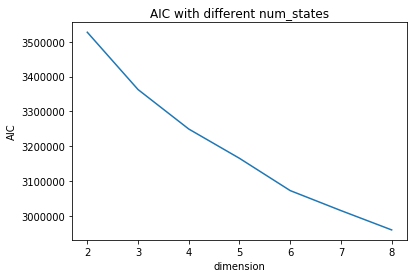

In [14]:
import matplotlib.pyplot as plt
dimension=list(range(2,9))
plt.plot(dimension,model_aic)
plt.title("AIC with different num_states")
plt.xlabel("dimension")
plt.ylabel("AIC")
plt.show()

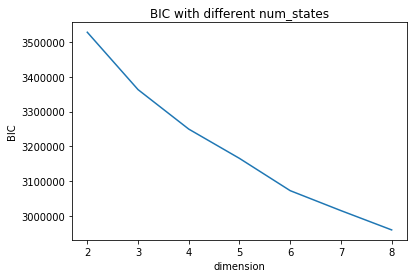

In [15]:
plt.plot(dimension,model_bic)
plt.title("BIC with different num_states")
plt.xlabel("dimension")
plt.ylabel("BIC")
plt.show()

In [16]:
print(model_aic)
print(model_bic)

[3527489.126680151, 3362797.4262853097, 3249307.1331475778, 3165085.7445511073, 3072309.4729521642, 3014881.8956067646, 2959270.598552609]
[3527622.1211102623, 3363032.724123199, 3249665.195074801, 3165587.0312492196, 3072974.445102721, 3015731.0138913216, 2960324.323652722]


In [17]:
obs=np.array(periculum)
obs=obs.astype(float)
obs=obs[~np.isnan(obs)]
obs=obs.reshape(-1,1)
obs_dim=1

In [29]:
num_states=4
hmm_state=hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=100)
hmm_state.fit(obs)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=4, n_iter=100, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [30]:
hmm_z=hmm_state.predict(obs)

In [31]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import math

Text(0.5, 0, 'time')

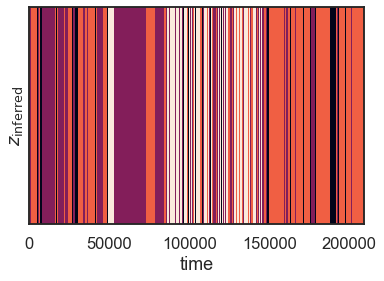

In [32]:
plt.imshow(hmm_z[None,:], aspect="auto")
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")